In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot

PCA

In [2]:
DigitData = load_digits()
DigitData.data.shape

(1797, 64)

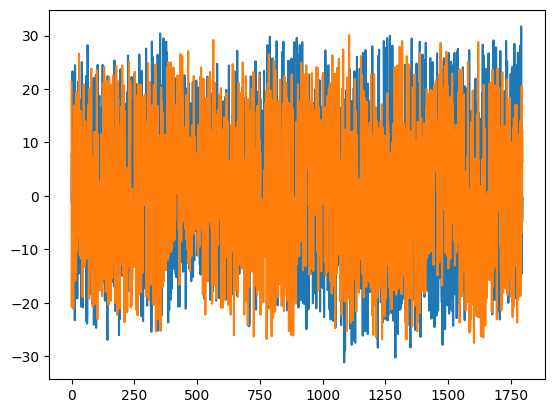

In [3]:
pca = PCA(n_components=2)
pcadata = pca.fit_transform(DigitData.data)
pyplot.plot(pcadata)

In [4]:
sum(pca.explained_variance_ratio_*100)

28.50936482369553

Percentage of variance captured by 2 components is 28.51%, we should find more component 

------------------------------------------------------------------------------------------
Clustering

In [5]:
ClusterDigit = load_digits()

In [6]:
ClusterDigit.data = scale(ClusterDigit.data)

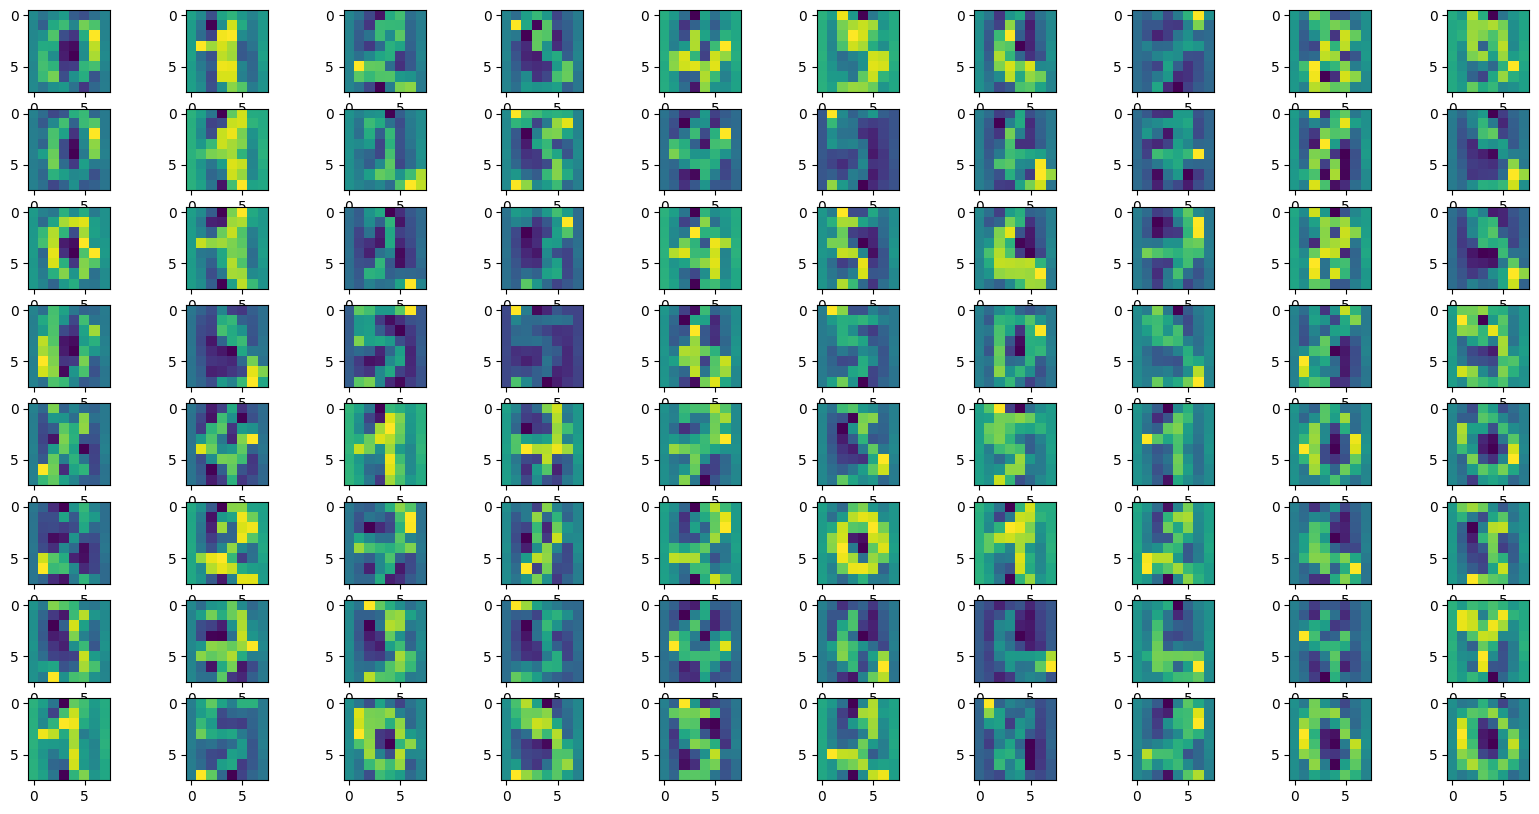

In [10]:
f = pyplot.figure(figsize=(20,10))
col = 10
row = 8
for i in range (1,81):
        draw_digit = ClusterDigit.data[i-1].reshape(8,8)
        f.add_subplot(row,col,i)
        pyplot.imshow(draw_digit)
pyplot.show()

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(ClusterDigit.data,ClusterDigit.target,test_size=0.2,shuffle=False)

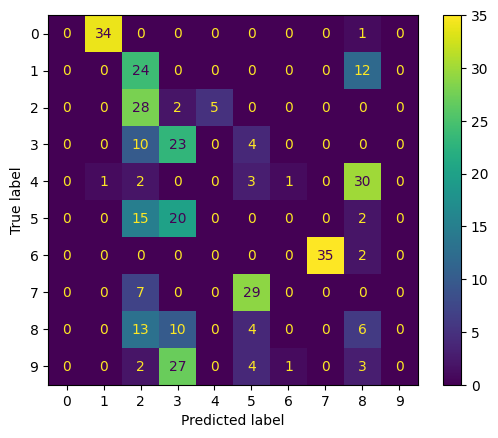

In [9]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state=0)
kmeans.fit(xtrain,ytrain)
res = kmeans.predict(xtest)
cm = metrics.confusion_matrix(ytest,res)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()